In [1]:
from fastai.vision.all import *
import fastai
import timm
import torch
import pandas as pd
torch.cuda.set_device(1)
import albumentations as A

In [2]:
df = pd.read_csv('Groundtruths/MMAC2023_Spherical_Equivalent_Prediction_Training_Labels.csv')

In [3]:
df

,image,spherical_equivalent,age,sex,height,weight
0,mmac_task_3_train_0001.png,0.125,57,male,174.5,83.7
1,mmac_task_3_train_0002.png,0.000,53,male,167.0,72.3
2,mmac_task_3_train_0003.png,-0.125,50,male,170.5,73.2
3,mmac_task_3_train_0004.png,-0.750,50,male,170.5,73.2
4,mmac_task_3_train_0005.png,-0.125,56,female,159.8,62.0
...,...,...,...,...,...,...
987,mmac_task_3_train_0988.png,1.000,72,male,167.0,73.0
988,mmac_task_3_train_0989.png,-0.125,53,male,177.2,85.2
989,mmac_task_3_train_0990.png,-0.625,53,male,177.2,85.2
990,mmac_task_3_train_0991.png,-0.250,56,male,173.5,80.7


In [4]:
df['spherical_equivalent'].describe()

count    992.000000
mean      -1.598412
std        2.556563
min      -10.000000
25%       -3.000000
50%       -0.750000
75%        0.156250
max        2.875000
Name: spherical_equivalent, dtype: float64

In [5]:
# df.loc[:,'spherical_equivalent'] = df['spherical_equivalent'].apply(lambda x : (x- (-1.59))/2.55)

In [6]:
df[df.spherical_equivalent>0]

,image,spherical_equivalent,age,sex,height,weight
0,mmac_task_3_train_0001.png,0.125,57,male,174.5,83.7
5,mmac_task_3_train_0006.png,1.125,52,female,151.2,53.4
6,mmac_task_3_train_0007.png,1.375,52,female,151.2,53.4
15,mmac_task_3_train_0016.png,0.875,47,female,157.9,60.4
16,mmac_task_3_train_0017.png,0.125,47,female,157.9,60.4
...,...,...,...,...,...,...
977,mmac_task_3_train_0978.png,2.250,76,male,168.7,68.2
979,mmac_task_3_train_0980.png,1.375,64,male,176.8,71.3
980,mmac_task_3_train_0981.png,1.000,58,male,167.6,75.4
986,mmac_task_3_train_0987.png,1.375,72,male,167.0,73.0


In [7]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    # EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname='convnext_base_grow'),
    ReduceLROnPlateau(patience=2)
]

In [8]:
db = DataBlock(blocks = (ImageBlock, RegressionBlock),
             splitter=RandomSplitter(seed=5),
             get_x = ColReader(0,pref="Images/TrainingSet/"),
             get_y=ColReader(1),
             item_tfms = [Resize(256)], # CropPad(200,200)
             batch_tfms=[*aug_transforms(size=224, min_scale=0.75,do_flip=True,flip_vert=True,
                  max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                         Normalize.from_stats(*imagenet_stats)])
dls = db.dataloaders(df,bs=32)

In [9]:
learn = Learner(dls,,pretrained=True,
            loss_func=MSELossFlat(), metrics=[mae,rmse,mse],
            cbs=callbacks).to_fp16()

/home/joheras/.conda/envs/python38/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/joheras/.conda/envs/python38/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Base_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,11.690682,5.287326,1.628746,2.299419,5.287326,00:06
1,10.889306,5.000282,1.615559,2.236131,5.000282,00:06
2,9.664646,5.063989,1.666642,2.250331,5.063989,00:06
3,8.564383,4.428774,1.566451,2.104465,4.428774,00:06
4,7.369316,4.275158,1.540659,2.067646,4.275158,00:06


Better model found at epoch 0 with valid_loss value: 5.287326335906982.


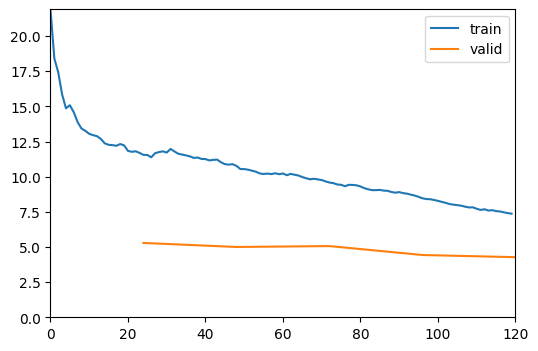

Better model found at epoch 1 with valid_loss value: 5.000282287597656.
Better model found at epoch 3 with valid_loss value: 4.428773880004883.
Better model found at epoch 4 with valid_loss value: 4.275158405303955.


epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,5.746668,5.384442,1.677351,2.320440,5.384442,00:08
1,5.125469,4.190470,1.463822,2.047064,4.190470,00:08
2,4.793625,4.184187,1.440567,2.045529,4.184187,00:08
3,4.683357,3.923385,1.417573,1.980753,3.923385,00:08
4,4.492879,3.809597,1.392706,1.951819,3.809597,00:08
5,4.460378,3.301256,1.308552,1.816936,3.301256,00:07
6,4.124720,3.011438,1.257238,1.735350,3.011438,00:08
7,4.143828,3.044277,1.278093,1.744786,3.044277,00:08
8,3.998836,3.255559,1.292656,1.804317,3.255559,00:08
9,3.954840,3.000212,1.275333,1.732112,3.000212,00:08


Better model found at epoch 0 with valid_loss value: 5.38444185256958.


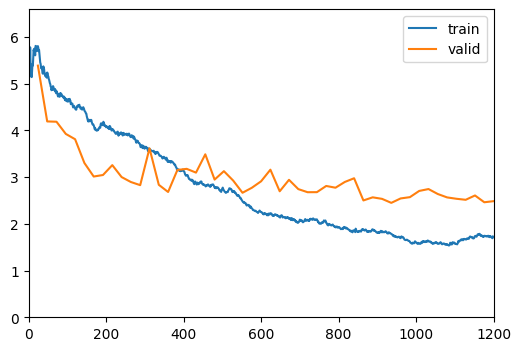

Better model found at epoch 1 with valid_loss value: 4.190470218658447.
Better model found at epoch 2 with valid_loss value: 4.184187412261963.
Better model found at epoch 3 with valid_loss value: 3.92338490486145.
Better model found at epoch 4 with valid_loss value: 3.8095967769622803.
Better model found at epoch 5 with valid_loss value: 3.3012561798095703.
Better model found at epoch 6 with valid_loss value: 3.0114378929138184.
Epoch 8: reducing lr to 0.0001080423348738869
Better model found at epoch 9 with valid_loss value: 3.000211715698242.
Better model found at epoch 10 with valid_loss value: 2.89399790763855.
Better model found at epoch 11 with valid_loss value: 2.8268866539001465.
Epoch 13: reducing lr to 0.00014857775907622643
Better model found at epoch 14 with valid_loss value: 2.680816888809204.
Epoch 16: reducing lr to 0.00014884430001904173
Epoch 18: reducing lr to 0.00014531573300784106
Epoch 20: reducing lr to 0.00013952718544384693
Better model found at epoch 22 with v

In [10]:
learn.fine_tune(50,base_lr=3e-3,freeze_epochs=5)

In [11]:
db = DataBlock(blocks = (ImageBlock, RegressionBlock),
             splitter=RandomSplitter(seed=5),
             get_x = ColReader(0,pref="Images/TrainingSet/"),
             get_y=ColReader(1),
             item_tfms = [Resize(384)], # CropPad(200,200)
             batch_tfms=[*aug_transforms(size=256, min_scale=0.75,do_flip=True,flip_vert=True,
                  max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                         Normalize.from_stats(*imagenet_stats)])
dls = db.dataloaders(df,bs=32)

epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,1.843313,2.617498,1.159761,1.617868,2.617498,00:08
1,1.831156,3.044877,1.271670,1.744957,3.044877,00:08
2,1.849866,3.031450,1.270619,1.741106,3.031450,00:08
3,1.883627,3.141568,1.280962,1.772447,3.141568,00:08
4,1.900783,2.724673,1.184312,1.650658,2.724673,00:08


Better model found at epoch 0 with valid_loss value: 2.617497682571411.


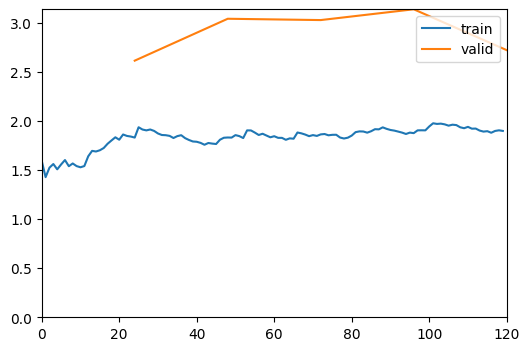

Epoch 2: reducing lr to 0.0001994831757654798
Epoch 4: reducing lr to 0.0002799040103592373


epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,1.727004,2.647675,1.172575,1.627168,2.647675,00:08
1,1.698014,2.576211,1.149344,1.605058,2.576211,00:08
2,1.671117,2.462151,1.119206,1.569124,2.462151,00:09
3,1.720783,2.616858,1.156878,1.617671,2.616858,00:09
4,1.735069,2.462465,1.127854,1.569224,2.462465,00:09
5,1.720138,2.359992,1.101313,1.536227,2.359992,00:09
6,1.796983,2.435702,1.105061,1.560674,2.435702,00:09
7,1.698899,2.650176,1.175734,1.627936,2.650176,00:09
8,1.677280,2.285014,1.081593,1.511626,2.285014,00:09
9,1.708940,2.407660,1.132801,1.551664,2.407660,00:09


Better model found at epoch 0 with valid_loss value: 2.647674560546875.


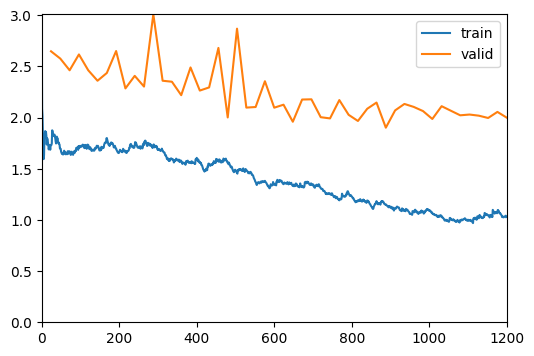

Better model found at epoch 1 with valid_loss value: 2.5762109756469727.
Better model found at epoch 2 with valid_loss value: 2.462151050567627.
Epoch 4: reducing lr to 5.9547698652606e-05
Better model found at epoch 5 with valid_loss value: 2.3599917888641357.
Epoch 7: reducing lr to 9.575074341156005e-05
Better model found at epoch 8 with valid_loss value: 2.2850143909454346.
Epoch 10: reducing lr to 0.0001297571999010596
Epoch 12: reducing lr to 0.00014459766931560996
Better model found at epoch 14 with valid_loss value: 2.2189254760742188.
Epoch 16: reducing lr to 0.00014884430001904173
Epoch 18: reducing lr to 0.00014531573300784106
Better model found at epoch 19 with valid_loss value: 2.0013084411621094.
Epoch 21: reducing lr to 0.00013584086746819819
Epoch 23: reducing lr to 0.0001270323127344803
Epoch 25: reducing lr to 0.00011655142096158626
Better model found at epoch 26 with valid_loss value: 1.9594122171401978.
Epoch 28: reducing lr to 9.844340515481735e-05
Epoch 30: reduci

In [12]:
learn.dls=dls
learn.fine_tune(50,base_lr=3e-3,freeze_epochs=5)

In [13]:
db = DataBlock(blocks = (ImageBlock, RegressionBlock),
             splitter=RandomSplitter(seed=5),
             get_x = ColReader(0,pref="Images/TrainingSet/"),
             get_y=ColReader(1),
             item_tfms = [Resize(640)], # CropPad(200,200)
             batch_tfms=[*aug_transforms(size=512, min_scale=0.75,do_flip=True,flip_vert=True,
                  max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                         Normalize.from_stats(*imagenet_stats)])
dls = db.dataloaders(df,bs=32)

epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,2.925424,2.277020,1.116326,1.508980,2.277020,00:16
1,2.592288,1.920309,1.060083,1.385752,1.920309,00:16
2,2.376931,1.830901,1.029176,1.353108,1.830901,00:16
3,2.284377,1.605886,0.959004,1.267235,1.605886,00:16
4,2.239082,1.811323,1.033008,1.345854,1.811323,00:17


Better model found at epoch 0 with valid_loss value: 2.2770204544067383.


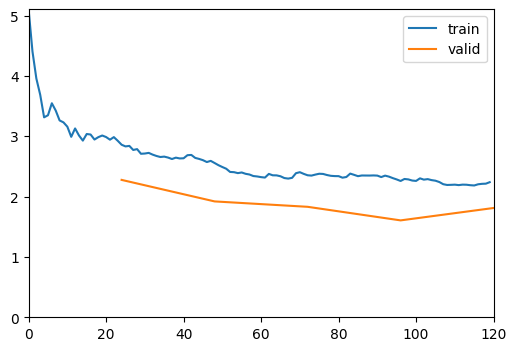

Better model found at epoch 1 with valid_loss value: 1.9203089475631714.
Better model found at epoch 2 with valid_loss value: 1.8309009075164795.
Better model found at epoch 3 with valid_loss value: 1.6058855056762695.


epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,1.841650,1.578047,0.963228,1.256203,1.578047,00:19
1,1.880850,1.577817,0.960525,1.256112,1.577817,00:19
2,1.832191,1.577712,0.958853,1.256070,1.577712,00:19
3,1.763155,1.543492,0.948299,1.242374,1.543492,00:19
4,1.674396,1.534543,0.951271,1.238767,1.534543,00:19
5,1.657708,1.591063,0.960679,1.261374,1.591063,00:19
6,1.701242,1.629536,0.979925,1.276533,1.629536,00:19
7,1.737340,1.627872,0.980446,1.275881,1.627872,00:19
8,1.697997,1.658215,0.964143,1.287717,1.658215,00:19
9,1.608897,1.843515,1.064715,1.357761,1.843515,00:19


Better model found at epoch 0 with valid_loss value: 1.5780470371246338.


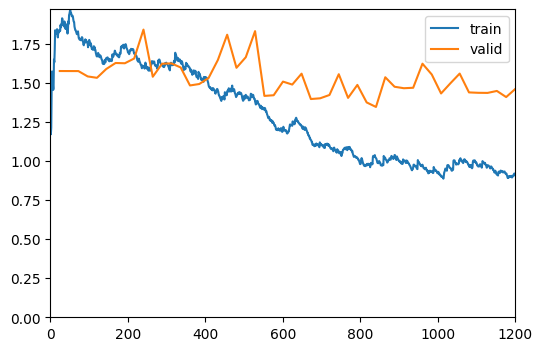

Better model found at epoch 1 with valid_loss value: 1.5778167247772217.
Better model found at epoch 2 with valid_loss value: 1.577712059020996.
Better model found at epoch 3 with valid_loss value: 1.5434919595718384.
Better model found at epoch 4 with valid_loss value: 1.5345432758331299.
Epoch 6: reducing lr to 8.32078061816599e-05
Epoch 8: reducing lr to 0.0001080423348738869
Epoch 10: reducing lr to 0.0001297571999010596
Epoch 12: reducing lr to 0.00014459766931560996
Better model found at epoch 14 with valid_loss value: 1.4855949878692627.
Epoch 16: reducing lr to 0.00014884430001904173
Epoch 18: reducing lr to 0.00014531573300784106
Epoch 20: reducing lr to 0.00013952718544384693
Better model found at epoch 22 with valid_loss value: 1.418607473373413.
Epoch 24: reducing lr to 0.00012198099548184392
Epoch 26: reducing lr to 0.00011078729256800237
Better model found at epoch 27 with valid_loss value: 1.3985711336135864.
Epoch 29: reducing lr to 9.196299358213701e-05
Epoch 31: reduc

In [14]:
learn.dls=dls
learn.fine_tune(50,base_lr=3e-3,freeze_epochs=5)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
preds,gt=learn.get_preds()

In [17]:
print(mean_absolute_error(preds,gt))

0.8671881


In [18]:
print(mean_absolute_error(preds,gt))

0.8671881


In [19]:
print(mean_squared_error(preds,gt))

1.3478625


In [20]:
df = pd.read_csv('dfNew5.csv')

In [21]:
db = DataBlock(blocks = (ImageBlock, RegressionBlock),
             splitter=ColSplitter('Split'),
             get_x = ColReader(0),
             get_y=ColReader(1),
             item_tfms = [Resize(640)], # CropPad(200,200)
             batch_tfms=[*aug_transforms(size=512, min_scale=0.75,do_flip=True,flip_vert=True,
                  max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                         Normalize.from_stats(*imagenet_stats)])

In [22]:
dls = db.dataloaders(df,bs=32)

epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,3.123299,1.057400,0.832456,1.028299,1.057400,00:36
1,2.067790,0.629459,0.623345,0.793385,0.629459,00:36
2,1.652666,0.691901,0.668896,0.831806,0.691901,00:36
3,1.576216,0.590670,0.587148,0.768550,0.590670,00:36
4,1.437386,0.652222,0.630357,0.807603,0.652222,00:36


Better model found at epoch 0 with valid_loss value: 1.057399868965149.


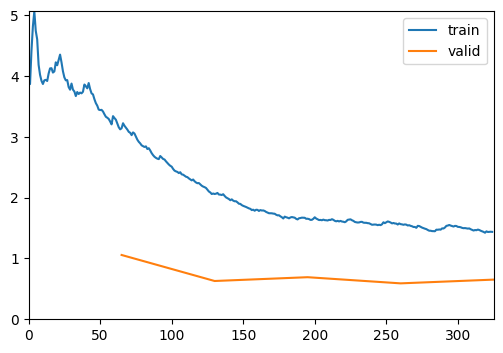

Better model found at epoch 1 with valid_loss value: 0.6294592022895813.
Better model found at epoch 3 with valid_loss value: 0.590669572353363.


epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,1.269765,0.526418,0.589833,0.725546,0.526418,00:44
1,1.236249,0.519987,0.573390,0.721101,0.519987,00:44
2,1.268777,0.578763,0.607685,0.760764,0.578763,00:44
3,1.223945,0.524917,0.583242,0.724511,0.524917,00:44
4,1.141177,0.556366,0.578652,0.745899,0.556366,00:44
5,1.106168,0.578805,0.592399,0.760792,0.578805,00:44
6,1.099354,0.760961,0.708238,0.872331,0.760961,00:44
7,1.140217,0.759683,0.699798,0.871598,0.759683,00:44
8,1.073197,0.638105,0.635993,0.798815,0.638105,00:44
9,1.071055,0.655503,0.637443,0.809632,0.655503,00:44


Better model found at epoch 0 with valid_loss value: 0.52641761302948.


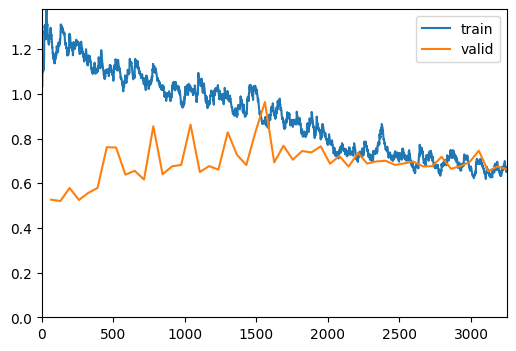

Better model found at epoch 1 with valid_loss value: 0.5199866890907288.
Epoch 3: reducing lr to 4.9708697953365404e-05
Epoch 5: reducing lr to 7.127521032030772e-05
Epoch 7: reducing lr to 9.607939321199012e-05
Epoch 9: reducing lr to 0.0001198324143333459
Epoch 11: reducing lr to 0.00013842712279285395
Epoch 13: reducing lr to 0.00014864835724912907
Epoch 15: reducing lr to 0.00014970728778613
Epoch 17: reducing lr to 0.00014732472686958118
Epoch 19: reducing lr to 0.00014261761467025013
Epoch 21: reducing lr to 0.00013573723441945377
Epoch 23: reducing lr to 0.00012690474090865962
Epoch 25: reducing lr to 0.00011640400856187912
Epoch 27: reducing lr to 0.00010457253512336642
Epoch 29: reducing lr to 9.179061983465047e-05
Epoch 31: reducing lr to 7.846904445833438e-05
Epoch 33: reducing lr to 6.503599514169437e-05
Epoch 35: reducing lr to 5.192324158407253e-05
Epoch 37: reducing lr to 3.955219175147862e-05
Epoch 39: reducing lr to 2.8320489983182364e-05
Epoch 41: reducing lr to 1.858

In [23]:
learn.dls=dls
learn.fine_tune(50,base_lr=3e-3,freeze_epochs=5)

In [24]:
# learn1 = vision_learner(dls,convnext_base)
# learn1.load('convnext_base_grow')
# learn1.export('convnext_base_grow.pkl')

/home/joheras/.conda/envs/python38/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/joheras/.conda/envs/python38/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Base_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Base_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/joheras/.conda/envs/python38/lib/python3.8/site-packages/fastai/learner.py:58: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")
